# Integração numérica

## Regra de Simpson

A regra do trapézio já nos proporciona uma precisão razoável, e é de fato bastante usado para calcular integrais dada a sua simplicidade e rapidez de execução. Ela também, com algumas pequenas modificações no código, permite que tenhamos segmentos de tamanho variável. Entretanto, quando necessitamos de uma maior precisão, principalmente se a função a ser integrada varia muito rapidamente, pode ser necessário um grande número de segmentos. Isso significa mais chamadas à função, e logo mais tempo computacional necessário.

De fato, a regra do trapézio usa uma reta para aproximar o valor da função quando calculamos a área sob a mesma. Podemos ter um resultado melhor se usarmos alguma curva para prazer a aproximação. A regra de Simpson faz isso usando uma curva quadrática, isto é, um polinômio de grau 2, como indica a figura abaixo.

![Regra de Simpson](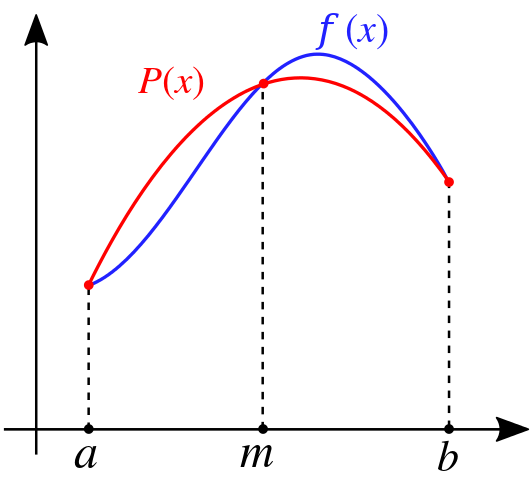
)

CC BY-SA 4.0 [Popletibus](https://en.wikipedia.org/wiki/Simpson%27s_rule#/media/File:Simpsons_method_illustration.svg)

Dados 3 pontos da função $f(x)$, podemos encontrar o polinômio de grau 2 $P(x)$ que passa exatamente sobre estes pontos. Isto é chamado de _interpolação_, e estudaremos alguns métodos mais adiante no curso. Por enquanto, vamos tratar do caso particular, com os limites de integração usando os pontos $a = -h$ e $b = h$, e um ponto extra em $x = 0$.

Queremos que $P(x)$ e $f(x)$ coincidam nesses pontos. Vamos calcular coeficientes do polinômio $P(x) = Ax^2 + Bx + C$ tal que

\begin{align}
P(-h) &= f(-h) \\
P(0) &= f(0) \\
P(h) &= f(h).
\end{align}

Substituindo $P(x)$,

\begin{align}
Ah^2 - Bh + C &= f(-h) \\
C &= f(0) \\
Ah^2 + Bh + C &= f(h).
\end{align}

Com este sistema de equações é possível encontrar os coeficientes $A$, $B$ e $C$, através de uma substituição direta. O coeficiente $C$ já está dado. Somando a primeia e terceira equações, e substituindo $C$, temos

$$
2Ah^2 + 2C = f(-h) + f(h) \\
A = \frac{f(-h) + f(h) + 2 f(0)}{2h^2}.
$$

Substituindo a primeira linha acima, dividida por 2, na primeira equação,

$$
\frac{f(-h) + f(h)}{2} - Bh = f(-h) \\
B = \frac{f(h) - f(-h)}{2h}.
$$

Conhecendo os coeficientes, podemos agora calcular a aproximação da integral,

\begin{align}
\int_{-h}^h f(x)\,\mathrm{d}x &\cong \int_{-h}^h P(x)\,\mathrm{d}x \\
\int_{-h}^h P(x)\,\mathrm{d}x &= \int_{-h}^h Ax^2 + B(x) + C\,\mathrm{d}x \\
&= \frac{A}{3} x^3\big|_{-h}^{h} + \frac{B}{2} x^2\big|_{-h}^{h} + Cx\big|_{-h}^{h} \\
&= \frac{2}{3} A h^3 + 2 C h.
\end{align}

Note que o termo em $B$ desaparece dados os limites simétricos da integração. Substituindo $A$ e $C$, e reorganizando os termos, ficamos com

\begin{align}
\int_{-h}^h P(x)\,\mathrm{d}x &= \frac{2}{3} \frac{f(-h) + f(h) + 2 f(0)}{2h^2} h^3 + 2 f(0) h \\
&= \frac{1}{3} \left[ f(-h) + f(h) + 2 f(0) \right] h + 2 f(0) h \\
&= \frac{1}{3} h \left[ f(-h) + f(h) + 4 f(0) \right].
\end{align}

Como esta é uma integral definida, se deslocarmos esta integral acima à direita ou à esquerda, a fórmula da área sob a curva não pode mudar. Assim, a integral deve ser a mesma para quaisquer três pontos igualmente espaçados.

Voltando à integral completa de $f(x)$, dividimos a integral em segmentos da mesma forma que fizemos antes. Porém, vamos aplicar a regra de Simpson para pares de segmentos. Neste caso, para o primeiro par de segmentos, os pontos devem ser $x = a$, $a + h$ e $a + 2h$. Para o segundo par, $a + 2h$, $a + 3h$ e $a + 4h$, e assim por diante. Ou Seja, $x_i$, $x_{i+1}$ e $x_{i+2}$. Veja que $N$ precisa ser um número par. Então, em termos gerais, a integral de um segmento é dada por

$$
\int_{x_i}^{x_{i + 2}} P(x)\,\mathrm{d}x = \frac{1}{3} h \left[ f(x_i) + 4 f(x_{i+1}) + f(x_{i+2}) \right].
$$

Assim, a integral da função $f(x)$ fica

\begin{align}
I &= \int_a^b f(x)\,\mathrm{d}x \cong \int_{a}^{a + 2h} P(x)\,\mathrm{d}x\ + \\
&+ \int_{a + 2h}^{a + 4h} P(x)\,\mathrm{d}x + \ldots + \int_{a + (N-2)h}^{a + Nh} P(x)\,\mathrm{d}x
\end{align}

Aqui substituir e reorganizar os termos, tal que tenhamos somas em função de $x_i$, dá um pouco mais de trabalho do que a regra do trapézio. No final devemos ter

$$
\int_a^b f(x)\,\mathrm{d}x \cong \frac{1}{3} h \left[ f(a) + f(b) + 4 \sum_{\substack{{i=1} \\ i\ \mathrm{ímpar}}}^{N-1} f(x_i) + 2 \sum_{\substack{{i=2} \\ i\ \mathrm{par}}}^{N-2} f(x_i) \right].
$$

A solução não é tão simples quanto a regra do trapézio, mas é facilmente programada em Python. Veja que temos dois laços, mas eles iteram cada um em metade dos pontos, o primeiro nos pontos com $i$ ímpar, e o segundo nos pontos com $i$ par. O número total de chamadas à função $f(x)$ é o mesmo. Em código, podemos iterar os elementos pares e ímpares separadamente fazendo

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'
import numpy as np

In [2]:
N = 10

print('Números ímpares.')
for i in range(1, N, 2):
    print(i)
print('Números pares.')
for i in range(2, N, 2):
    print(i)
    

Números ímpares.
1
3
5
7
9
Números pares.
2
4
6
8


### Exercício 1

Vamos calcular a mesma integral que testamos nos métodos anteriores,

$$
I = \int_{0.1}^{1.0} \frac{\mathrm{d}x}{x} = - \ln(0.1).
$$

**a.** Calcule a integral para $N=6$.

In [2]:
def f(x):
    return 1/x

In [3]:
a = 0.1
b = 1.0
N = 6
h = (b - a)/N

Soma_p = 0
Soma_I = 0

for i in range(1,N,2): # impar
    Soma_I += f(a + i*h)

for i in range(2,N,2): # par
    Soma_p += f(a + i*h)

I = h/3 * (f(a) + f(b) + 4*Soma_I + 2*Soma_p)
print(I)

2.3417876241405655


**b.** Defina a função `integral_simpson(f, a, b, N)`, que calcula a integral entre os limites `a` e `b`, com `N` segmentos, para um integrando `f` qualquer.

In [5]:
def integral_simpson(func,a,b,N):

    h = (b - a)/N
    
    somaP = 0
    somaI = 0

    for i in range(1,N,2): # ímpar
        somaI += func(a + i*h)
    
    for i in range(2,N,2): # par
        somaP += func(a + i*h)

    integral = (func(a) + func(b) + 4*somaI + 2*somaP)*h/3

    return integral

**c.** Faça um gráfico da convergência do valor da integral. Calcule a integral usando a regra de Simpson e compare com a regra do trapézio. Lembre que $N$ deve ser par.

In [6]:
def integral_trap(func,a,b,N):
    h = (b - a)/N

    Soma = 0
    for i in range(N):
        Soma += func(a + i*h)

    Integral = h * ((0.5*f(a) + 0.5*f(b)) + Soma)

    return Integral

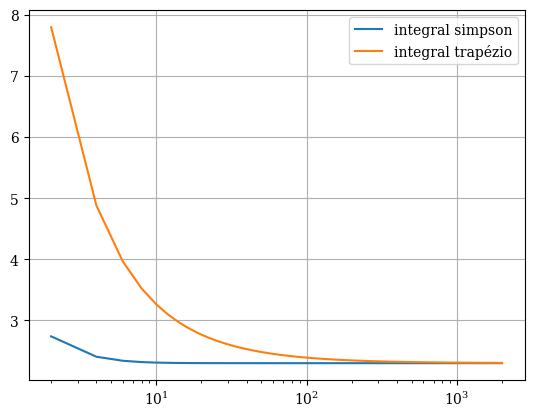

In [19]:
NN = np.arange(2,2001,2)
ints_simp = np.zeros(len(NN))
ints_trap = np.zeros(len(NN))

fig, ax = plt.subplots(1,1)

for i in range(len(NN)):
    ints_simp[i] = integral_simpson(f,a,b,NN[i])
    ints_trap[i] = integral_trap(f,a,b,NN[i])

ax.plot(NN,ints_simp,label = "integral simpson")
ax.plot(NN,ints_trap, label = "integral trapézio")
ax.set_xscale("log")
ax.legend()
ax.grid()

## Conclusão

Aprendemos a calcular integrais definidas usando métodos baseados nas regras retangular, do trapézio e de Simpson. A regra retangular tem valor apenas didático, por sua simplicidade. Para todos os casos efetivos, a regra de Simpson é uma boa escolha, dada a sua velocidade computacional, e convergência rápida. Caso por algum motivo os intervalos de integração não sejam igualmente espaçados, como no caso de dados experimentais ($f(x)$ pode ser uma tabela), devemos utilizar a regra do trapézio. Fica como exercício modificar a regra do trapézio para usar intervalos não-uniformes.